2018-12-03 19:03:07.100634
1 hours calculated at 2018-12-03 19:03:14.533927
2 hours calculated at 2018-12-03 19:03:18.649655
3 hours calculated at 2018-12-03 19:03:23.850716
4 hours calculated at 2018-12-03 19:03:40.899157
5 hours calculated at 2018-12-03 19:04:20.230350
6 hours calculated at 2018-12-03 19:05:15.240111
7 hours calculated at 2018-12-03 19:06:29.527741
8 hours calculated at 2018-12-03 19:08:00.196893
9 hours calculated at 2018-12-03 19:09:44.376700
10 hours calculated at 2018-12-03 19:11:48.701713
11 hours calculated at 2018-12-03 19:14:05.077999
12 hours calculated at 2018-12-03 19:16:39.746960
13 hours calculated at 2018-12-03 19:19:30.826418
14 hours calculated at 2018-12-03 19:22:34.775797
15 hours calculated at 2018-12-03 19:25:56.026458
16 hours calculated at 2018-12-03 19:29:25.657376
17 hours calculated at 2018-12-03 19:33:16.227360
18 hours calculated at 2018-12-03 19:37:20.307744
19 hours calculated at 2018-12-03 19:41:43.643017
20 hours calculated at 2018-12-0

<Figure size 432x288 with 0 Axes>

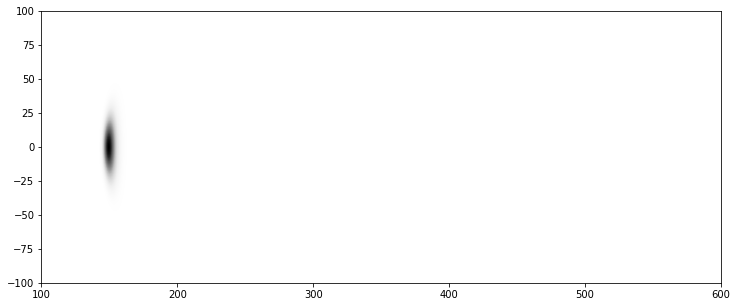

In [1]:
%matplotlib inline

from datetime import datetime

from numpy import (
    array,
    sin,
    cos,
    round,
    pi,
    log,
    zeros,
    arcsin,
    where,
    save,
)
from matplotlib.cm import Greys
from matplotlib import pyplot
from scipy.stats import norm

spatial_density = int(2E3)
center = spatial_density // 4, 4 * spatial_density // 5, 0

angular_density = 1
velocity = 15
chart_side = 500

radius = spatial_density * velocity / chart_side

space = zeros((spatial_density // 2, spatial_density, angular_density * 360))
space_ = zeros((spatial_density // 2, spatial_density, angular_density * 360))

circle = []
deltas = []
for i in range(360 * angular_density):
    t = pi * i / (180 * angular_density)
    position = (round(radius * array([sin(t), cos(t)]))).astype(int)
    circle.append(norm.pdf(pi - t, scale=1/4))
    deltas.append((*position, i))
    
circle = array(circle)
deltas = array(deltas)

space[center] = 1

print(datetime.now())
for n in range(24):
    space_[:] = 0
    for y, x, i in zip(*where(space > 1E-10)):
        space_[deltas[:, 0] + y, deltas[:, 1] + x, deltas[:, 2] - i] += circle * space[y, x, i]
    space[:] = space_
    space /= space.sum()
    save(f"{n + 1:>02}.npy", space.sum(axis=2))
    print(f"{n + 1} hours calculated at {datetime.now()}")

Z = space.sum(axis=2)
del space
del space_
print(Z.max())

pyplot.clf()
fig, ax = pyplot.subplots(figsize=(25, 5))
ax.imshow(
    Z,
    interpolation=None,
    cmap=Greys,
    origin='lower',
    extent=[100, 600, -100, 100],
    vmax=abs(Z).max(),
    vmin=0,
)